In [72]:
"""
Author: Milan Mitrovic,
s4663796
"""
#ID: Identifies of data instances
#Rooms: Number of rooms
#Price: Price in dollars
#Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
#Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.
#SellerG: Real Estate Agent
#Date: Date sold
#Distance: Distance from CBD in KMs 
#Regionname: General Region (West, North West, North, North east …etc)
#Propertycount: Number of properties that exist in the suburb.
#Bedroom2 : Scraped # of Bedrooms (from different source)
#Bathroom: Number of Bathrooms
#Car: Number of car spots
#Landsize: Land Size in square metres
#BuildingArea: Building Size in square metres
#CouncilArea: Governing council for the area
#Suburb: Suburb name
#Address: Address of property
#YearBuilt: Year build of property
#Postcode: Postcode for property
#Lattitude: self explanotory
#Longitude: self explanotory

'\nAuthor: Milan Mitrovic,\ns4663796\n'

In [73]:
#Packages
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import os
from pandas import get_dummies
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from itertools import combinations
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [74]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

In [75]:
#Importing dataset
df= pd.read_csv('C:/Datasets/melbourne_house_data.csv')

In [76]:
#Set the display options to show all columns and rows
pd.set_option('display.max_columns', None)

In [77]:
#Dimensions of the dataset
df.shape

(2000, 22)

In [78]:
#Removes duplicates
df.drop_duplicates()

,ID,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/6/16,2.5,3067,3,1,2.0,120,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019
1,2,Abbotsford,6/241 Nicholson St,1,u,300000,S,Biggin,8/10/16,2.5,3067,1,1,1.0,0,NaN,NaN,Yarra,-37.80080,144.99730,Northern Metropolitan,4019
2,3,Abbotsford,123/56 Nicholson St,2,u,750000,S,Biggin,12/11/16,2.5,3067,2,2,1.0,0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4019
3,4,Abbotsford,45 William St,2,h,1172500,S,Biggin,13/8/16,2.5,3067,2,1,1.0,195,NaN,NaN,Yarra,-37.80840,144.99730,Northern Metropolitan,4019
4,5,Abbotsford,5/20 Abbotsford St,1,u,426000,SP,Greg,22/8/16,2.5,3067,1,1,1.0,0,NaN,NaN,Yarra,-37.80160,144.99880,Northern Metropolitan,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Sunbury,64 Stewarts La,3,h,605000,S,One,26/8/17,31.7,3429,3,2,2.0,755,229.0,1996.0,NaN,-37.56533,144.71233,Western Metropolitan,14092
1996,1997,Viewbank,149 Graham Rd,5,h,1316000,SP,Nelson,26/8/17,8.9,3084,5,3,3.0,696,NaN,NaN,NaN,-37.73501,145.08341,Eastern Metropolitan,2698
1997,1998,Wantirna,16 chesterfield Ct,4,h,951000,S,Ray,26/8/17,14.7,3152,4,2,2.0,704,200.0,1981.0,NaN,-37.85639,145.23536,Eastern Metropolitan,5424
1998,1999,Williamstown,83 Power St,3,h,1170000,S,Raine,26/8/17,6.8,3016,3,2,4.0,436,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380


In [13]:
#Display data type for every feature
df.dtypes

ID                 int64
Suburb            object
Address           object
Rooms              int64
Type              object
Price              int64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode           int64
Bedroom2           int64
Bathroom           int64
Car              float64
Landsize           int64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount      int64
dtype: object

In [14]:
#Display top 5 rows of data
df.head()

,ID,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/6/16,2.5,3067,3,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019
1,2,Abbotsford,6/241 Nicholson St,1,u,300000,S,Biggin,8/10/16,2.5,3067,1,1,1.0,0,NaN,NaN,Yarra,-37.8008,144.9973,Northern Metropolitan,4019
2,3,Abbotsford,123/56 Nicholson St,2,u,750000,S,Biggin,12/11/16,2.5,3067,2,2,1.0,0,94.0,2009.0,Yarra,-37.8078,144.9965,Northern Metropolitan,4019
3,4,Abbotsford,45 William St,2,h,1172500,S,Biggin,13/8/16,2.5,3067,2,1,1.0,195,NaN,NaN,Yarra,-37.8084,144.9973,Northern Metropolitan,4019
4,5,Abbotsford,5/20 Abbotsford St,1,u,426000,SP,Greg,22/8/16,2.5,3067,1,1,1.0,0,NaN,NaN,Yarra,-37.8016,144.9988,Northern Metropolitan,4019


In [79]:
#Rename multiple columns
df.rename(columns={'SellerG': 'Seller', 'Bedroom2': 'Bedroom', 'Landsize': 'LandSize', 'Regionname': 'RegionName', 'Propertycount': 'PropertyCount', 'Lattitude': 'Latitude', 'Longtitude': 'Longitude' }, inplace=True)

In [80]:
#Transform Date dtype to datetime64
df['Date'] = pd.to_datetime(df['Date'])
#Confirm Date conversion 
df.head(1)

,ID,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,Bedroom,Bathroom,Car,LandSize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,RegionName,PropertyCount
0,1,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,2016-04-06,2.5,3067,3,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


In [81]:
#Convert certain columns from float to int
df['Car'] = df['Car'].astype('Int64')
df['YearBuilt'] = df['YearBuilt'].astype('Int64')

print(df.dtypes)

ID                        int64
Suburb                   object
Address                  object
Rooms                     int64
Type                     object
Price                     int64
Method                   object
Seller                   object
Date             datetime64[ns]
Distance                float64
Postcode                  int64
Bedroom                   int64
Bathroom                  int64
Car                       Int64
LandSize                  int64
BuildingArea            float64
YearBuilt                 Int64
CouncilArea              object
Latitude                float64
Longitude               float64
RegionName               object
PropertyCount             int64
dtype: object


In [58]:
#Concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             2000 non-null   int64         
 1   Suburb         2000 non-null   object        
 2   Address        2000 non-null   object        
 3   Rooms          2000 non-null   int64         
 4   Type           2000 non-null   object        
 5   Price          2000 non-null   int64         
 6   Method         2000 non-null   object        
 7   Seller         2000 non-null   object        
 8   Date           2000 non-null   datetime64[ns]
 9   Distance       2000 non-null   float64       
 10  Postcode       2000 non-null   int64         
 11  Bedroom        2000 non-null   int64         
 12  Bathroom       2000 non-null   int64         
 13  Car            1992 non-null   Int64         
 14  LandSize       2000 non-null   int64         
 15  BuildingArea   1063 n

In [59]:
#Statistical summary of numerical features
df.describe()

,ID,Rooms,Price,Distance,Postcode,Bedroom,Bathroom,Car,LandSize,BuildingArea,YearBuilt,Latitude,Longitude,PropertyCount
count,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,1992.0,2000.000000,1063.000000,1216.0,2000.000000,2000.000000,2000.000000
mean,1000.500000,2.944500,1.079097e+06,9.888800,3104.686500,2.915500,1.530000,1.59739,455.734000,146.260583,1963.737664,-37.808045,144.993968,7476.963500
std,577.494589,0.953874,6.432057e+05,5.855238,91.460558,0.950164,0.665072,0.936751,563.189788,132.070698,36.345545,0.079856,0.099640,4440.910221
min,1.000000,1.000000,1.310000e+05,0.700000,3000.000000,0.000000,0.000000,0.0,0.000000,0.000000,1830.0,-38.164920,144.556660,438.000000
25%,500.750000,2.000000,6.458750e+05,5.900000,3046.000000,2.000000,1.000000,1.0,163.000000,94.000000,1940.0,-37.854798,144.933543,4217.000000
50%,1000.500000,3.000000,9.050000e+05,9.200000,3082.000000,3.000000,1.000000,2.0,407.000000,128.000000,1970.0,-37.800500,144.998880,6543.000000
75%,1500.250000,3.000000,1.320000e+06,12.800000,3147.000000,3.000000,2.000000,2.0,637.000000,175.000000,1997.0,-37.755100,145.055150,10331.000000
max,2000.000000,8.000000,5.600000e+06,41.000000,3977.000000,8.000000,5.000000,8.0,14196.000000,3558.000000,2017.0,-37.565330,145.412880,21650.000000


In [60]:
#Statisical summary of object features
df.describe(include = 'object')

,Suburb,Address,Type,Method,Seller,CouncilArea,RegionName
count,2000,2000,2000,2000,2000,1794,2000
unique,253,1991,3,5,146,29,8
top,Reservoir,443 Punt Rd,h,S,Nelson,Moreland,Southern Metropolitan
freq,55,2,1386,1361,238,182,692


In [65]:
#Identifies missing values
df.isnull().sum()

ID                 0
Suburb             0
Address            0
Rooms              0
Type               0
Price              0
Method             0
Seller             0
Date               0
Distance           0
Postcode           0
Bedroom            0
Bathroom           0
Car                8
LandSize           0
BuildingArea     937
YearBuilt        784
CouncilArea      206
Latitude           0
Longitude          0
RegionName         0
PropertyCount      0
dtype: int64

In [82]:
#Removing null values from Car
df.dropna(subset=['Car'], inplace=True)
df.isnull().sum()

ID                 0
Suburb             0
Address            0
Rooms              0
Type               0
Price              0
Method             0
Seller             0
Date               0
Distance           0
Postcode           0
Bedroom            0
Bathroom           0
Car                0
LandSize           0
BuildingArea     933
YearBuilt        780
CouncilArea      198
Latitude           0
Longitude          0
RegionName         0
PropertyCount      0
dtype: int64

In [83]:
#Replace null values in BuildingArea with the median
building_area_median = df['BuildingArea'].median()
df['BuildingArea'].fillna(building_area_median, inplace=True)

#Replace null values in YearBuilt with the mode 
year_built_mode = df['YearBuilt'].mode()[0]
df['YearBuilt'].fillna(year_built_mode, inplace=True)

#Replace null values in CouncilArea column with the mode 
council_area_mode = df['CouncilArea'].mode()[0]
df['CouncilArea'].fillna(council_area_mode, inplace=True)

#Validate imputation
df.isnull().sum()

ID               0
Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
Seller           0
Date             0
Distance         0
Postcode         0
Bedroom          0
Bathroom         0
Car              0
LandSize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Latitude         0
Longitude        0
RegionName       0
PropertyCount    0
dtype: int64

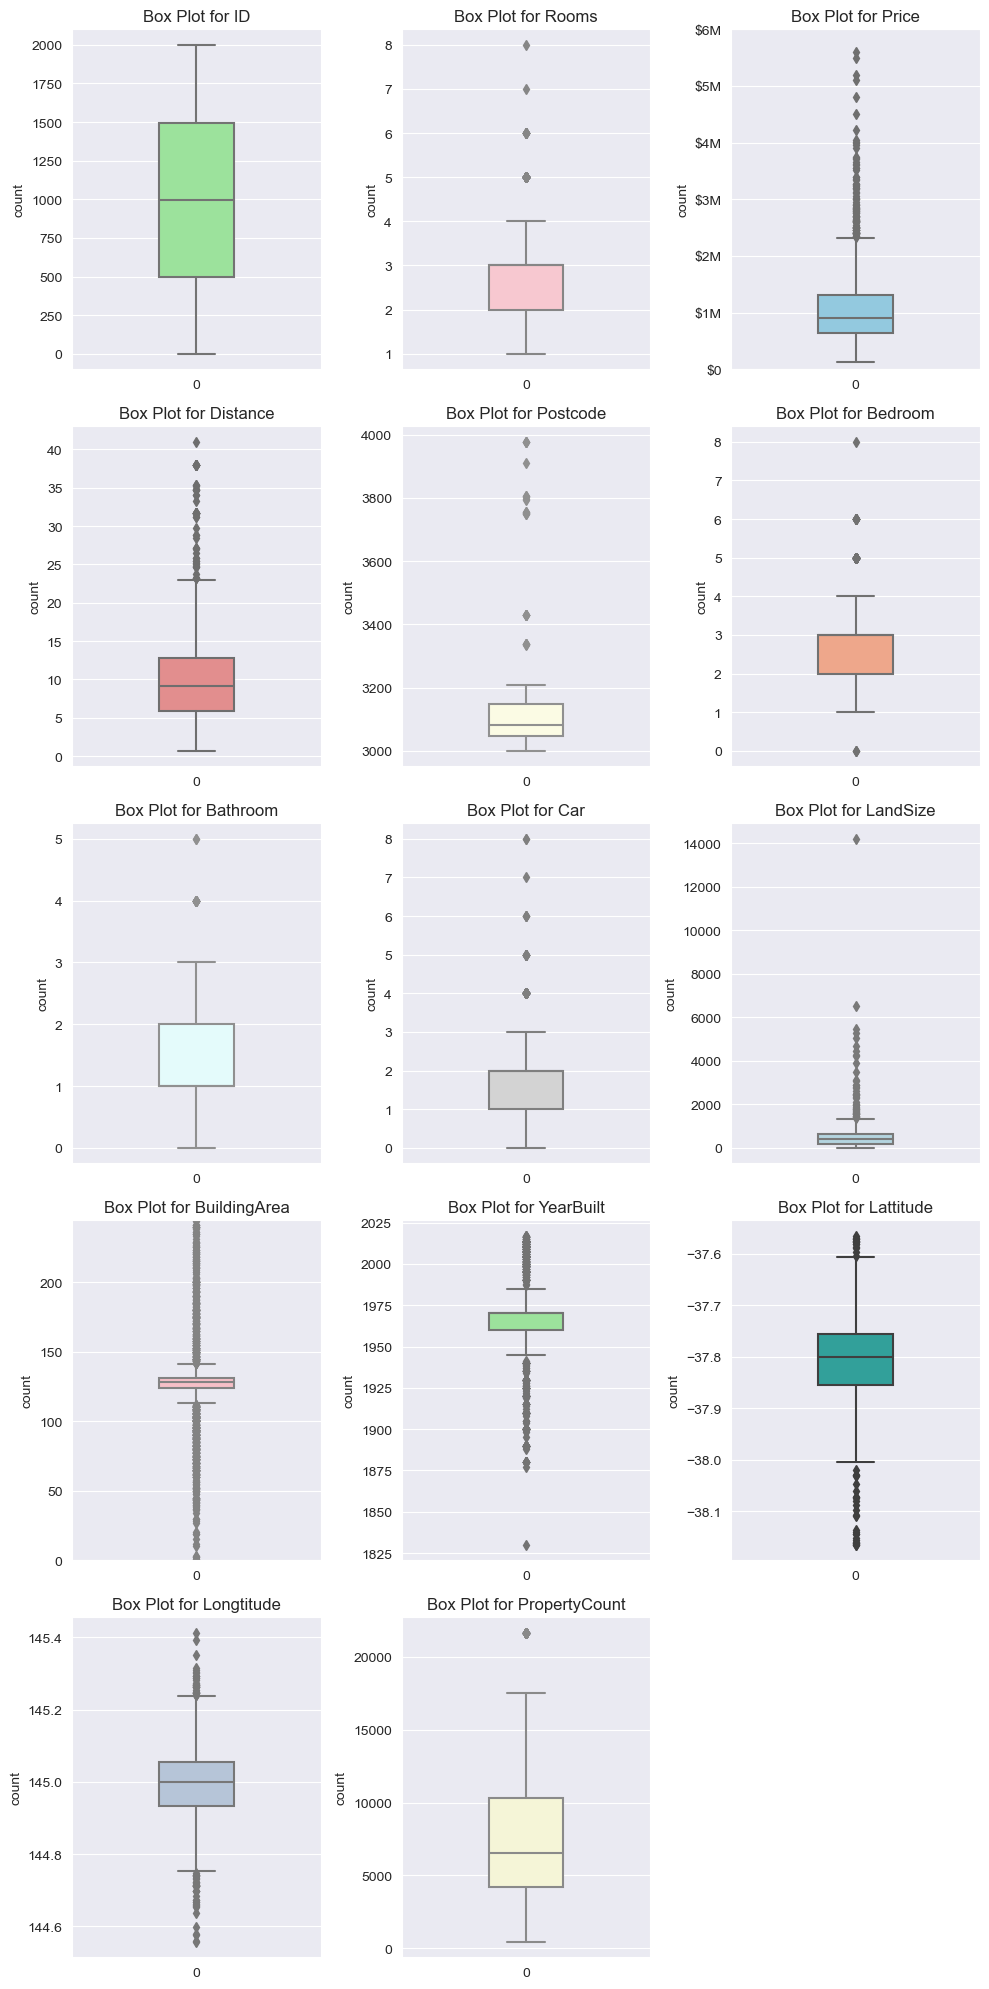

In [421]:
#Select numerical features
numerical_columns = df.select_dtypes(exclude=['object']).columns

sns.set_style("darkgrid")
#Create a figure with 5 rows and 3 columns of subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 20))
axes = axes.flatten()

#Define light colors
colors = ['lightgreen', 'pink', 'skyblue', 'lightcoral', 'lightyellow', 'lightsalmon', 'lightcyan', 'lightgrey', 'lightblue', 'lightpink', 'lightgreen', 'lightseagreen', 'lightsteelblue', 'lightgoldenrodyellow']

#Iterate over each numerical column and plot a Box Plot
for i, column in enumerate(numerical_columns):
    sns.boxplot(df[column], ax=axes[i], color=colors[i], width=0.3)
    axes[i].set_title(f"Box Plot for {column}")
    axes[i].set_ylabel('count')  # Set y-axis label to 'count'

    #Set custom y-axis limits and ticks for the Price plot
    if column == 'Price':
        percentile_95 = df[column].quantile(0.95)
        axes[i].set_ylim(0, percentile_95)  # Adjust the upper limit to the 95th percentile

        #Define custom tick positions and labels
        custom_ticks = [0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000]

        #Set custom ticks and labels
        axes[i].set_yticks(ticks=custom_ticks)
        axes[i].set_yticklabels(['$0', '$1M', '$2M', '$3M', '$4M', '$5M', '$6M'])
        
    #Set custom y-axis limits for the BuildingArea plot
    elif column == 'BuildingArea':
        percentile_95_building_area = df[column].quantile(0.95)
        axes[i].set_ylim(0, percentile_95_building_area)  # Adjust the upper limit to the 95th percentile

#Remove empty subplots
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [84]:
#Check the number of zero values in multiple columns
zero_counts = df[['Bedroom', 'Bathroom', 'LandSize', 'BuildingArea', 'Car']].apply(lambda col: (col == 0).sum())
print("Number of zero values in each column:")
print(zero_counts)

Number of zero values in each column:
Bedroom           3
Bathroom          5
LandSize        305
BuildingArea      4
Car             151
dtype: int64


In [24]:
#Investigate BuildingArea's extreme upper outlier
df[df["BuildingArea"] == 3558]

,ID,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,Bedroom,Bathroom,Car,LandSize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,RegionName,PropertyCount
363,364,Fitzroy North,186 Queens Pde,2,t,930000,S,Nelson,2016-03-09,3.5,3068,2,3,0,2778,3558.0,1970,Yarra,-37.7903,144.9859,Northern Metropolitan,6244


In [553]:
#Investigate LandSize's zero values
df[(df["LandSize"] == 0) & (df["Type"] == "t")]

,ID,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,Bedroom,Bathroom,Car,LandSize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,RegionName,PropertyCount
227,228,Canterbury,3/34 Faversham Rd,3,t,1843000,S,Jellis,27/6/16,9.0,3126,3,2,2,0,128,1970,Boroondara,-37.82070,145.08540,Southern Metropolitan,3265
266,267,Clifton Hill,53 John St,2,t,640000,VB,Miles,28/8/16,3.4,3068,2,1,1,0,128,1970,Yarra,-37.78730,144.99610,Northern Metropolitan,2954
507,508,Kensington,1/5 Wight St,2,t,773000,S,Rendina,26/7/16,4.2,3031,2,1,1,0,90,1970,Melbourne,-37.79370,144.92950,Northern Metropolitan,5263
589,590,Moorabbin,24a Franklin St,3,t,800000,S,Buxton,28/8/16,14.6,3189,3,2,1,0,128,1999,Kingston,-37.93740,145.05420,Southern Metropolitan,2555
624,625,Northcote,338 Separation St,2,t,701000,SP,Nelson,17/9/16,5.5,3070,2,1,1,0,109,2000,Darebin,-37.77110,145.01300,Northern Metropolitan,11364
757,758,Richmond,21A Kent St,2,t,842000,S,Jellis,18/3/17,2.6,3121,2,2,1,0,2,1970,Yarra,-37.81450,145.00140,Northern Metropolitan,14949
879,880,Thornbury,4b Newcastle St,3,t,910000,S,Love,7/11/16,6.5,3071,3,2,1,0,128,1970,Darebin,-37.75510,145.01080,Northern Metropolitan,8870
954,955,Brunswick East,3/14 Oconnor St,2,t,771000,SP,Nelson,28/5/16,4.5,3057,2,2,2,0,128,1970,Moreland,-37.77360,144.97250,Northern Metropolitan,5533
955,956,Brunswick East,3/10 Rathdowne St,3,t,805000,S,Woodards,30/7/16,4.5,3057,2,1,1,0,114,2003,Moreland,-37.77890,144.97390,Northern Metropolitan,5533
999,1000,Murrumbeena,4/19 Rosella St,3,t,860000,SP,Buxton,22/5/16,12.1,3163,3,2,2,0,128,2013,Glen Eira,-37.89390,145.07150,Southern Metropolitan,4442


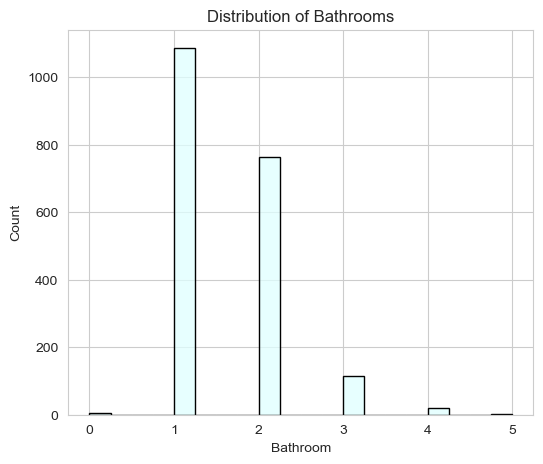

In [66]:
#Histogram which reflects the Bathrooms distribution
plt.figure(figsize=(6,5))
sns.set_style("whitegrid")
sns.histplot(data=df, x='Bathroom', bins = 20, color='lightcyan', edgecolor = 'black', linewidth = 1)
plt.title('Distribution of Bathrooms')
#plt.tight_layout()
plt.show()

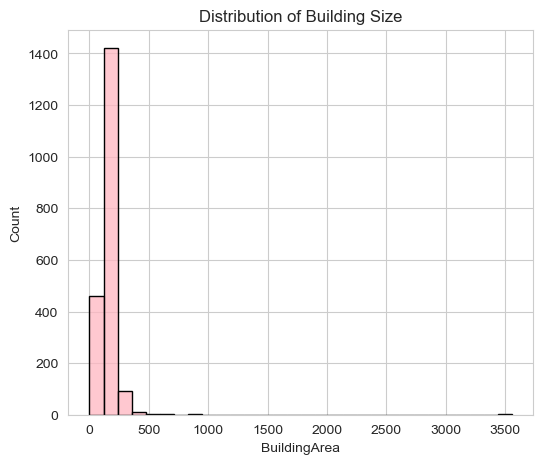

In [70]:
#Histogram which reflects the BuildingArea distribution
plt.figure(figsize=(6,5))
sns.set_style("whitegrid")
sns.histplot(data=df, x='BuildingArea', bins = 30, color='lightpink', edgecolor = 'black', linewidth = 1)
plt.title('Distribution of Building Size')
#plt.tight_layout()
plt.show()

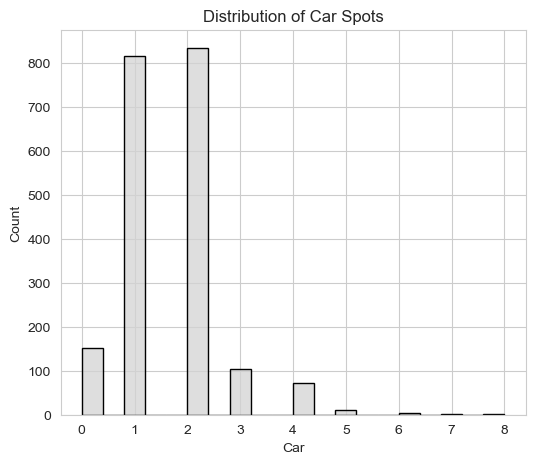

In [27]:
#Histogram which reflects the Car distribution
plt.figure(figsize=(6,5))
sns.set_style("whitegrid")
sns.histplot(data=df, x='Car', bins = 20, color='lightgrey', edgecolor = 'black', linewidth = 1)
plt.title('Distribution of Car Spots')
#plt.tight_layout()
plt.show()

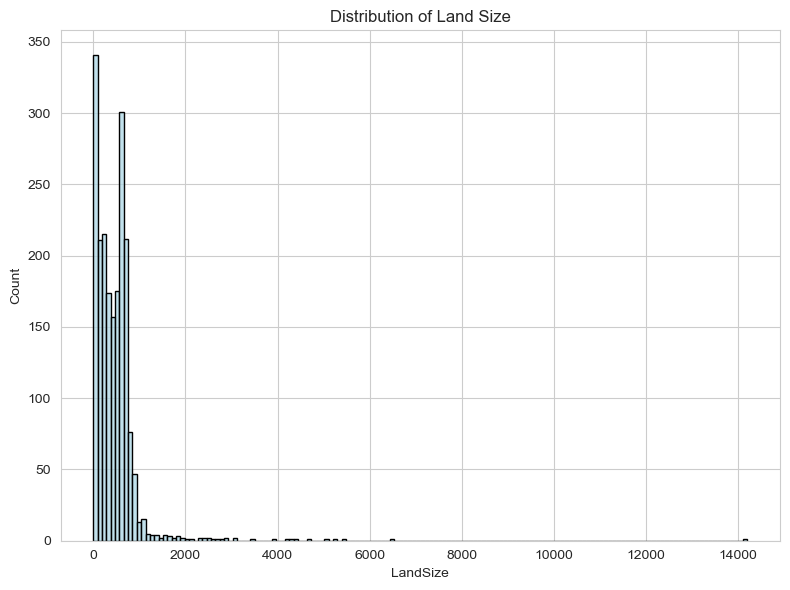

In [72]:
#Histogram which reflects the LandSize distribution
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.histplot(data=df, x='LandSize', bins = 150, color='lightblue', edgecolor = 'black', linewidth = 1)
plt.title('Distribution of Land Size')
plt.tight_layout()
plt.show()

In [85]:
#Remove insignificant 0-values in Bedroom, Bathroom, and BuildingArea's 3558 extreme upper outlier

#Drop '3558' row
df.drop(index=df[df['BuildingArea']==3558].index,inplace=True)

#Drop 0-value rows
df.drop(index=df[df['Bedroom']==0].index,inplace=True)
df.drop(index=df[df['Bathroom']==0].index,inplace=True)
df.drop(index=df[df['BuildingArea']==0].index,inplace=True)

#Validate removal
print('Number of Zero values in Bedroom:  ', df[df['Bedroom']==0].shape[0])
print('Number of Zero values in Bathroom:  ', df[df['Bathroom']==0].shape[0])
print('Number of Zero values in BuildingArea:  ', df[df['BuildingArea']==0].shape[0])

Number of Zero values in Bedroom:   0
Number of Zero values in Bathroom:   0
Number of Zero values in BuildingArea:   0


In [86]:
#Check the number of zero values in multiple columns
zero_counts = df[['Bedroom', 'Bathroom', 'LandSize', 'BuildingArea', 'Car']].apply(lambda col: (col == 0).sum())
print("Number of zero values in each column:")
print(zero_counts)

Number of zero values in each column:
Bedroom           0
Bathroom          0
LandSize        303
BuildingArea      0
Car             145
dtype: int64


In [87]:
#Replace 0-values in Car with the median
car_median = df['Car'].median()
df['Car'].replace(0, car_median, inplace=True)

#Replace 0-values in LandSize with the median
landsize_median = df['LandSize'].median()
df['LandSize'].replace(0, landsize_median, inplace=True)

#Validate removal/imputation of zero values in multiple columns
zero_counts = df[['Bedroom', 'Bathroom', 'LandSize', 'BuildingArea', 'Car']].apply(lambda col: (col == 0).sum())
print("Number of zero values in each column:")
print(zero_counts)

Number of zero values in each column:
Bedroom         0
Bathroom        0
LandSize        0
BuildingArea    0
Car             0
dtype: int64


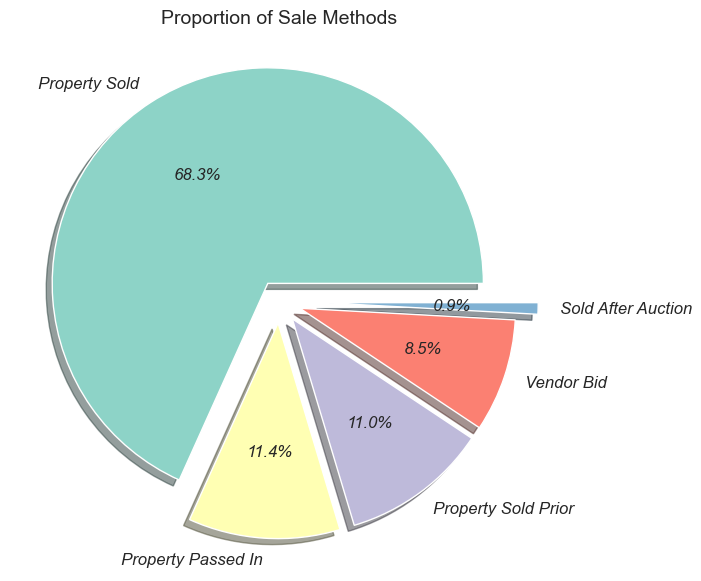

In [834]:
#Pie chart displaying the proportion of Method
plt.figure(figsize=(10,7))
plt.title('Proportion of Sale Methods', fontsize=14)

#Define explode values
explode = [0.1 if pct != min(df.Method.value_counts(normalize=True)) * 100 else 0.2 for pct in df.Method.value_counts(normalize=True) * 100]

plt.pie(df.Method.value_counts(),labels=['Property Sold', 'Property Passed In', 'Property Sold Prior', 'Vendor Bid', 'Sold After Auction'],autopct='%1.1f%%',
        colors=sns.color_palette('Set3', 5),shadow=True,textprops={'fontsize':12,'style':'italic'}, explode=explode)
plt.show()

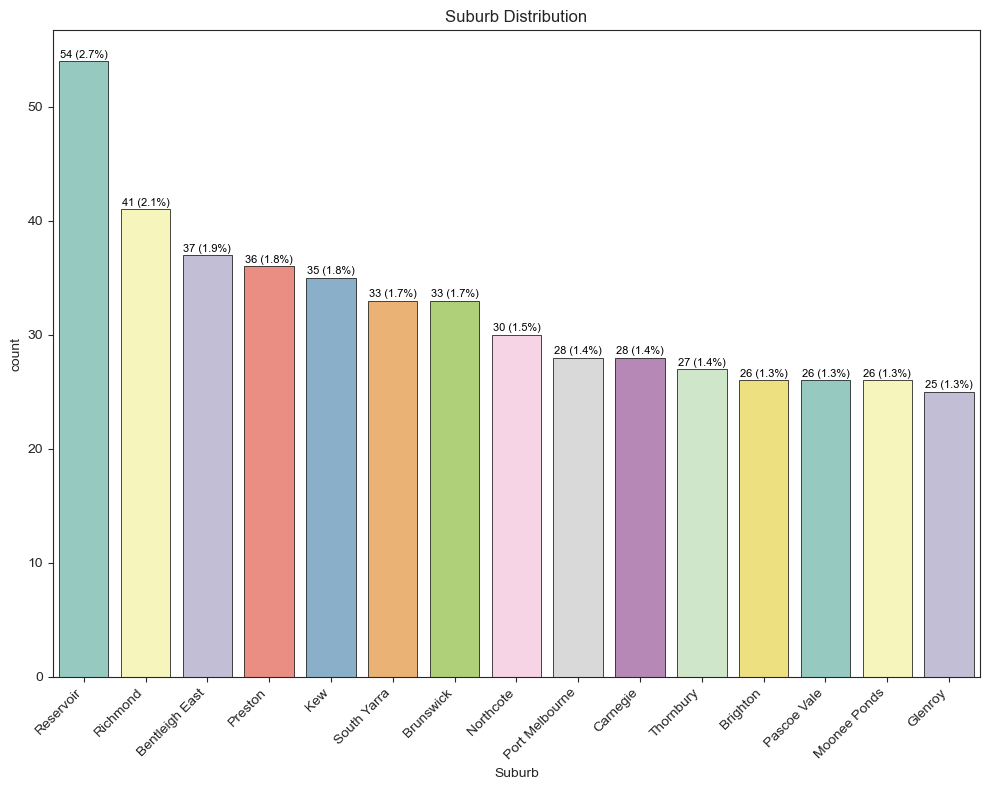

In [769]:
#Countplot depicting Suburb Distribution
plt.figure(figsize=(10, 8))
sns.set_style("ticks")
ax = sns.countplot(x='Suburb', data=df, palette='Set3', order=df['Suburb'].value_counts().index[:15], edgecolor='black', linewidth=0.5)
plt.title('Suburb Distribution')

#Add annotations on top of each bar
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count} ({p.get_height() / len(df) * 100:.1f}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 1), 
                textcoords='offset points')
plt.xticks(rotation=45, ha='right')  
#plt.xticks(fontsize = 11)
plt.tight_layout()
plt.show()

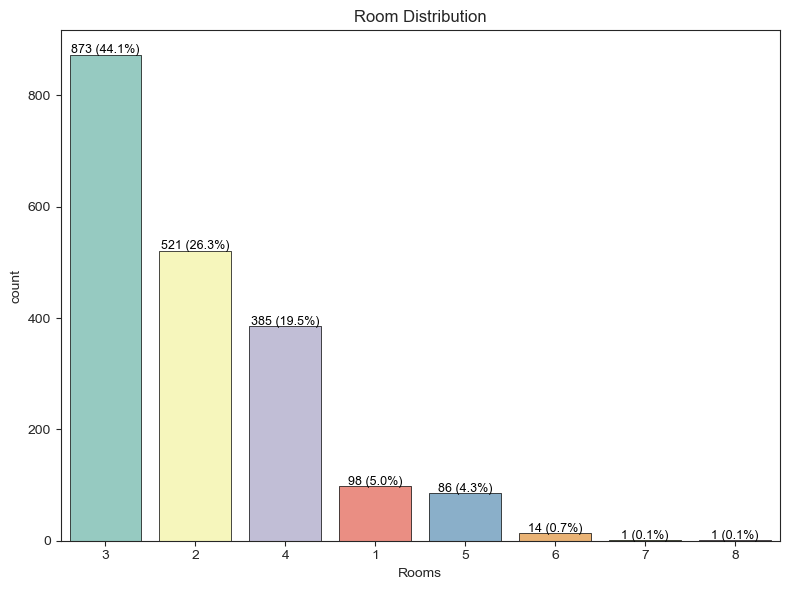

In [688]:
#Countplot depicting Room Distribution
plt.figure(figsize=(8, 6))
sns.set_style("ticks")
ax = sns.countplot(x='Rooms', data=df, palette='Set3', order=df['Rooms'].value_counts().index[0:8], edgecolor='black', linewidth=0.5)
plt.title('Room Distribution')

#Add annotations on top of each bar
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count} ({p.get_height() / len(df) * 100:.1f}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 3), 
                textcoords='offset points')
plt.tight_layout()
plt.show()

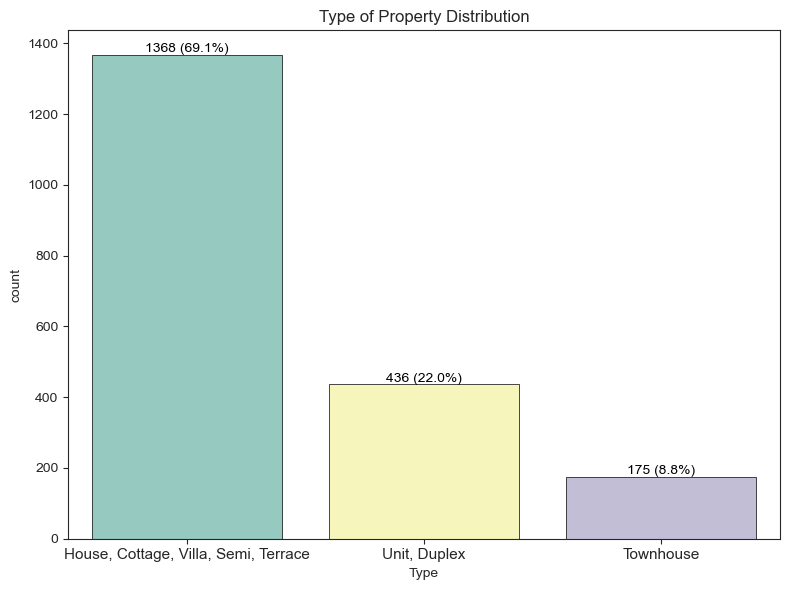

In [797]:
#Countplot depicting Type Distribution
plt.figure(figsize=(8, 6))
sns.set_style("ticks")
ax = sns.countplot(x='Type', data=df, palette='Set3', edgecolor='black', linewidth=0.5)
plt.title('Type of Property Distribution')

#Set xticks and xticklabels
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['House, Cottage, Villa, Semi, Terrace', 'Unit, Duplex', 'Townhouse'], fontsize = 11)

#Add annotations on top of each bar
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count} ({p.get_height() / len(df) * 100:.1f}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 4), 
                textcoords='offset points')
plt.tight_layout()
plt.show()

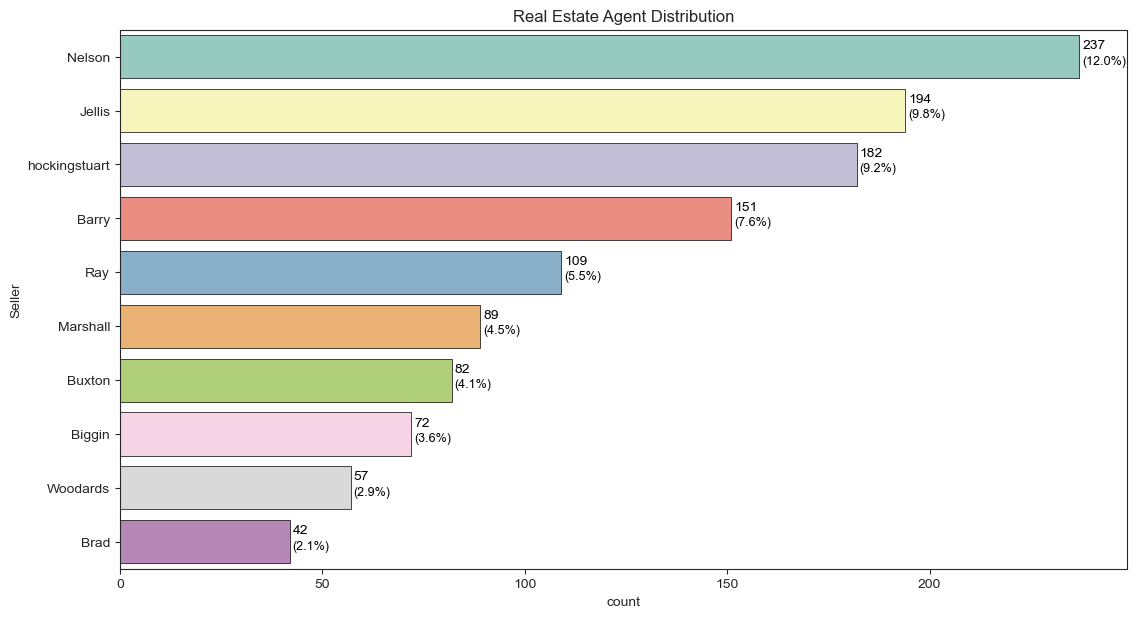

In [911]:
#Countplot depicting Seller Distribution
plt.figure(figsize=(13, 7))
sns.set_style("ticks")
ax = sns.countplot(y='Seller', data=df, order=df['Seller'].value_counts().index[0:10], palette='Set3', edgecolor='black', linewidth=0.5)
plt.title('Real Estate Agent Distribution')

#Add annotations 
for p in ax.patches:
    count = int(p.get_width())  # Use get_width() instead of get_height() for the y-axis
    proportion = p.get_width() / len(df) * 100
    ax.annotate(f'({proportion:.1f}%)', 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=9, color='black', xytext=(2, -3), 
                textcoords='offset points')
    ax.annotate(f'{count}', 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=10, color='black', xytext=(2, 8), 
                textcoords='offset points')

#plt.tight_layout()
plt.show()

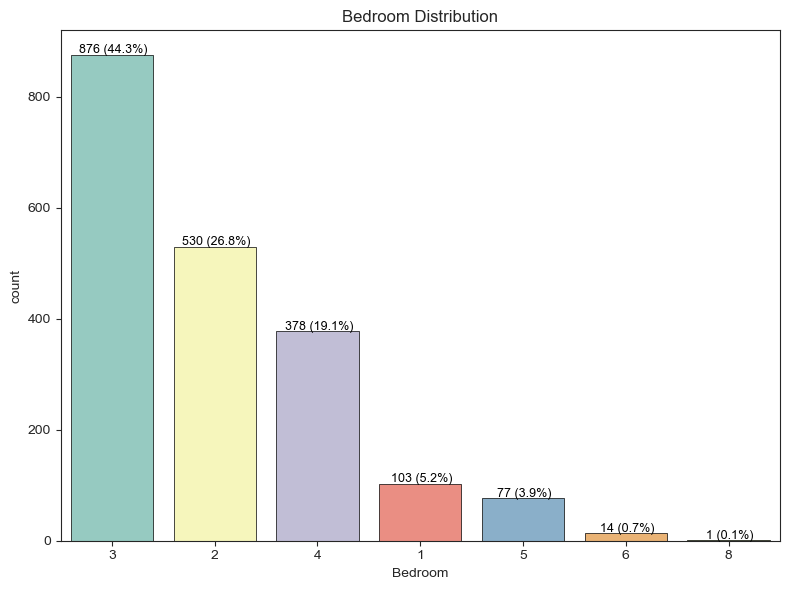

In [46]:
#Countplot depicting Bedroom Distribution
plt.figure(figsize=(8, 6))
sns.set_style("ticks")
ax = sns.countplot(x='Bedroom', data=df, palette='Set3', order=df['Bedroom'].value_counts().index, edgecolor='black', linewidth=0.5)
plt.title('Bedroom Distribution')

#Add annotations on top of each bar
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count} ({p.get_height() / len(df) * 100:.1f}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=9, color='black', xytext=(1, 3), 
                textcoords='offset points')
plt.tight_layout()
plt.show()

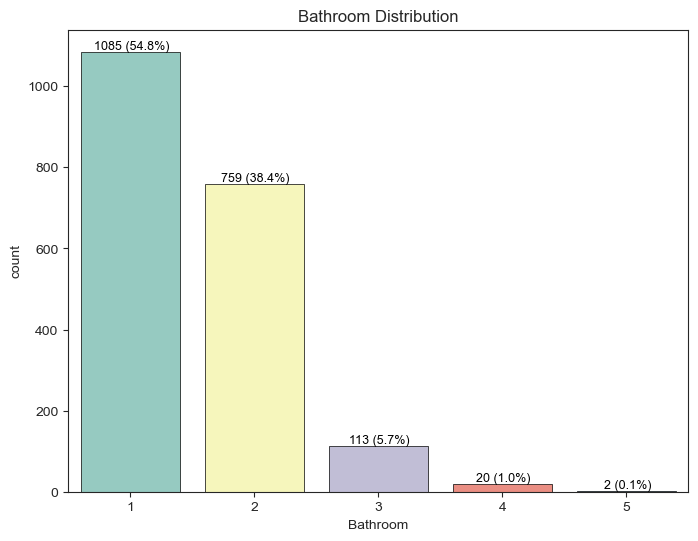

In [56]:
#Countplot depicting Bathroom Distribution
plt.figure(figsize=(8, 6))
sns.set_style("ticks")
ax = sns.countplot(x='Bathroom', data=df, palette='Set3', order=df['Bathroom'].value_counts().index, edgecolor='black', linewidth=0.5)
plt.title('Bathroom Distribution')

#Add annotations on top of each bar
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count} ({p.get_height() / len(df) * 100:.1f}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=9, color='black', xytext=(1, 4), 
                textcoords='offset points')
#plt.tight_layout()
plt.show()

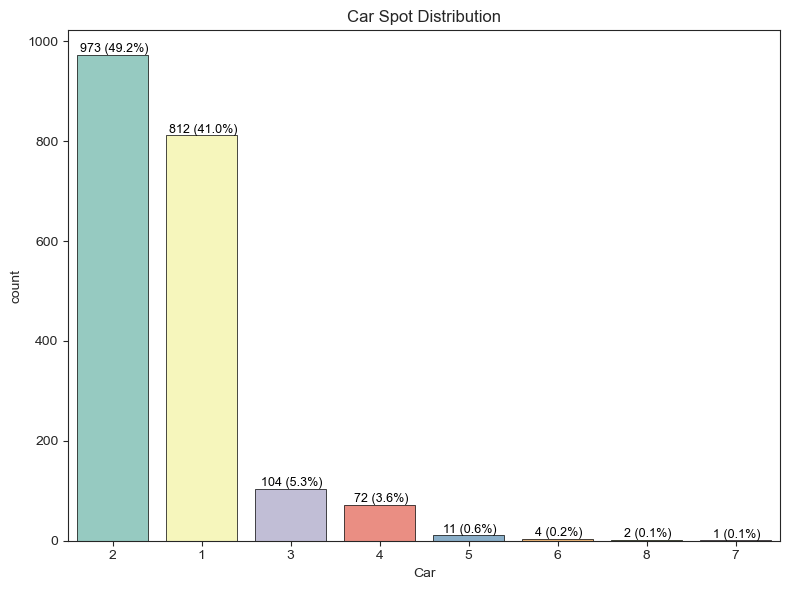

In [64]:
#Countplot depicting Car Distribution
plt.figure(figsize=(8, 6))
sns.set_style("ticks")
ax = sns.countplot(x='Car', data=df, palette='Set3', order=df['Car'].value_counts().index, edgecolor='black', linewidth=0.5)
plt.title('Car Spot Distribution')

#Add annotations on top of each bar
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count} ({p.get_height() / len(df) * 100:.1f}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=9, color='black', xytext=(1, 4), 
                textcoords='offset points')
plt.tight_layout()
plt.show()

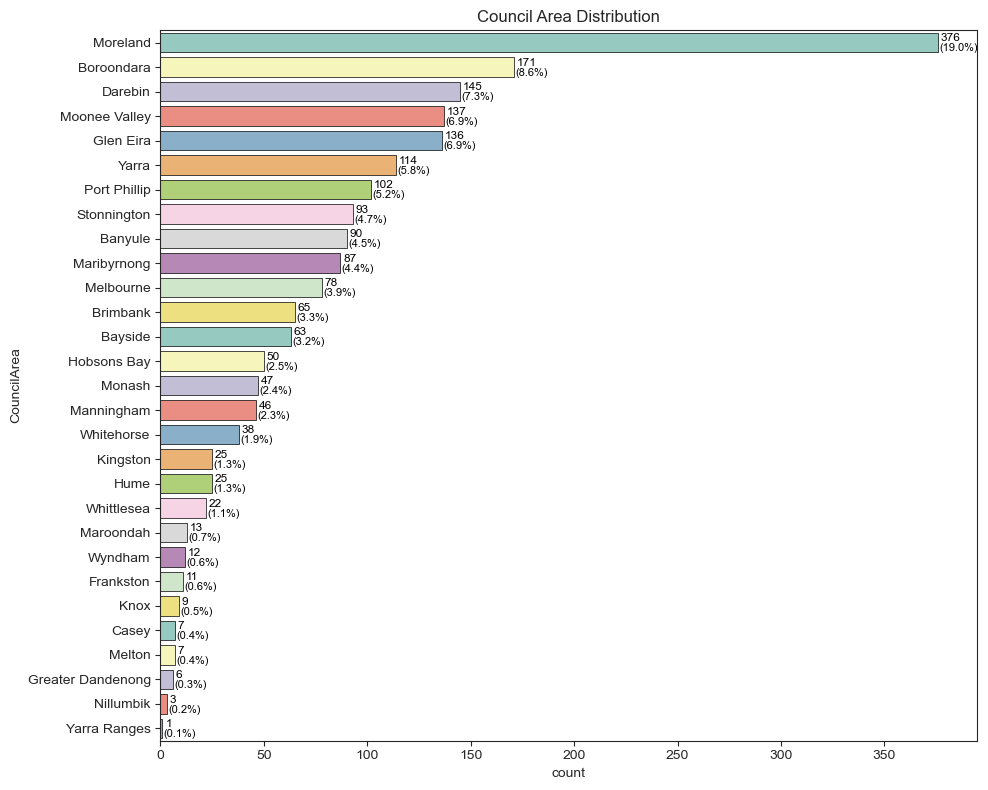

In [99]:
#Countplot depicting CouncilArea Distribution
plt.figure(figsize=(10, 8))
sns.set_style("ticks")
ax = sns.countplot(y='CouncilArea', data=df, palette='Set3', order=df['CouncilArea'].value_counts().index, edgecolor='black', linewidth=0.5)
plt.title('Council Area Distribution')

#Add annotations 
for p in ax.patches:
    count = int(p.get_width()) 
    proportion = p.get_width() / len(df) * 100
    ax.annotate(f'({proportion:.1f}%)', 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=8, color='black', xytext=(1, -4), 
                textcoords='offset points')
    ax.annotate(f'{count}', 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=8.5, color='black', xytext=(2, 3), 
                textcoords='offset points')
plt.tight_layout()
plt.show()

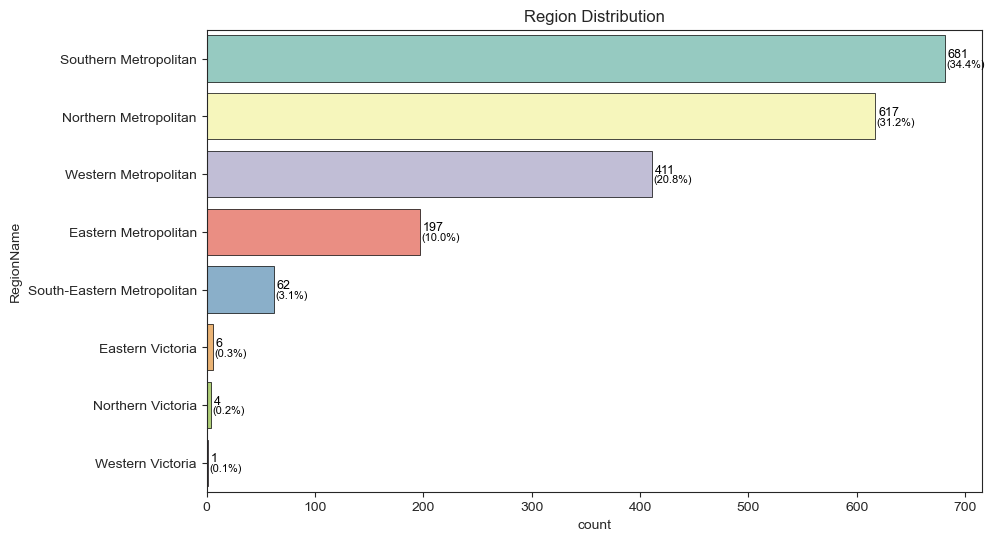

In [115]:
#Countplot depicting RegionName Distribution
plt.figure(figsize=(10, 6))
sns.set_style("ticks")
ax = sns.countplot(y='RegionName', data=df, palette='Set3', order=df['RegionName'].value_counts().index, edgecolor='black', linewidth=0.5)
plt.title('Region Distribution')

#Add annotations
for p in ax.patches:
    count = int(p.get_width())  # Use get_width() instead of get_height() for the y-axis
    proportion = p.get_width() / len(df) * 100
    ax.annotate(f'({proportion:.1f}%)', 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=8, color='black', xytext=(1, -4), 
                textcoords='offset points')
    ax.annotate(f'{count}', 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=9, color='black', xytext=(2, 3), 
                textcoords='offset points')
#plt.tight_layout()
plt.show()

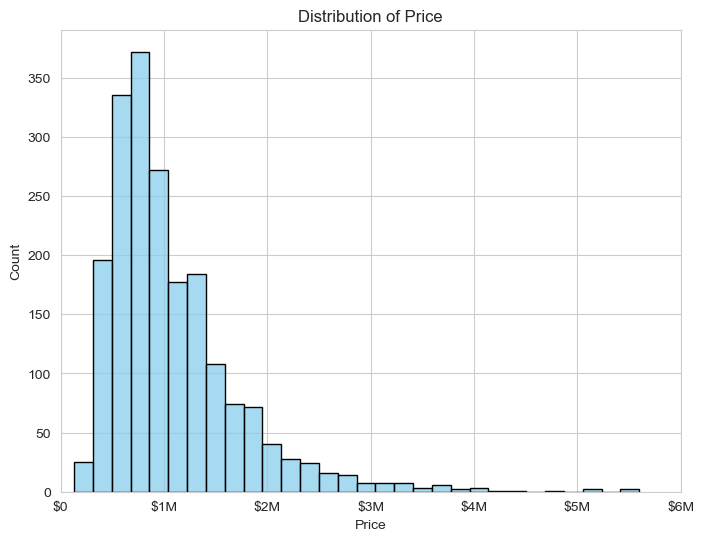

In [34]:
#Set custom y-axis limits and ticks for the Price plot
percentile_95 = df['Price'].quantile(0.95)
custom_ticks = [0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000]

#Plot histogram for Price with custom y-axis limits and ticks
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.histplot(data=df, x='Price', bins=30, color='skyblue', edgecolor='black', linewidth=1)
plt.title('Distribution of Price')
plt.xlim(0, percentile_95)  # Set y-axis limit
plt.xticks(custom_ticks, ['$0', '$1M', '$2M', '$3M', '$4M', '$5M', '$6M'])  
plt.show()

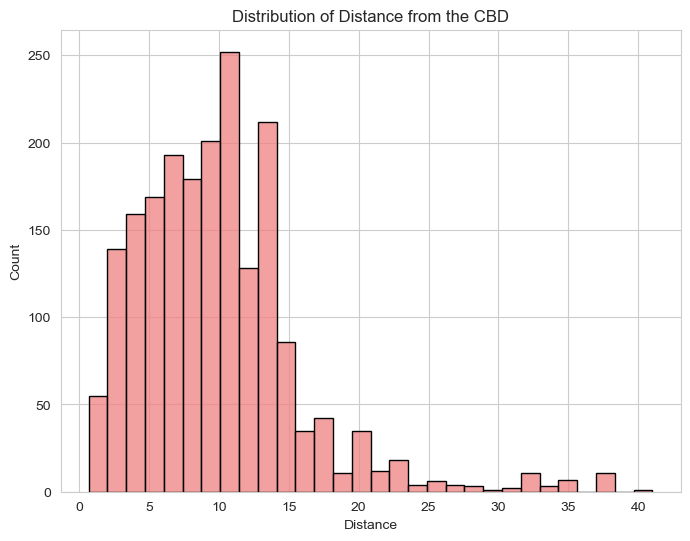

In [141]:
#Histogram which reflects the Distance distribution
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.histplot(data=df, x='Distance', bins = 30, color='lightcoral', edgecolor = 'black', linewidth = 1)
plt.title('Distribution of Distance from the CBD')
plt.show()

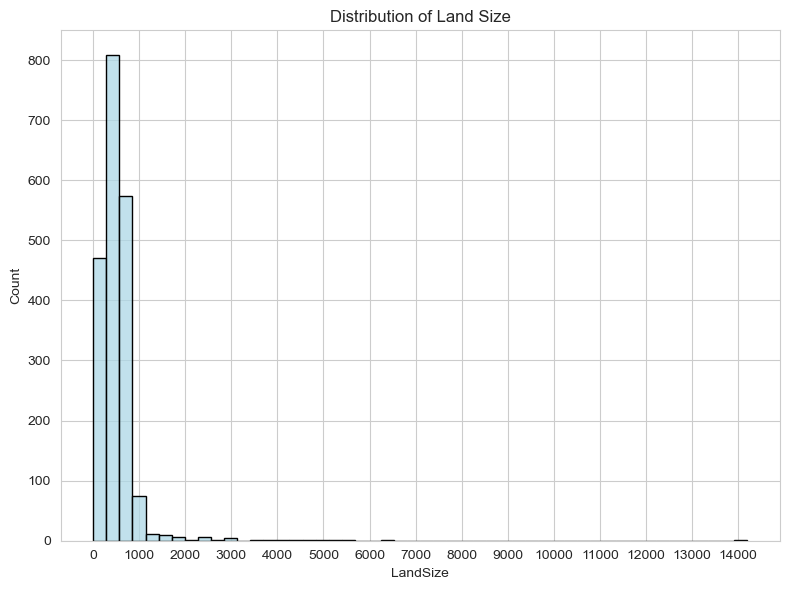

In [168]:
#Histogram depicting LandSize Distribution
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.histplot(data=df, x='LandSize', bins=50, color='lightblue', edgecolor='black', linewidth=1)
plt.title('Distribution of Land Size')
plt.xticks(ticks=[i*1000 for i in range(int(df['LandSize'].max()//1000)+1)])
plt.tight_layout()
plt.show()

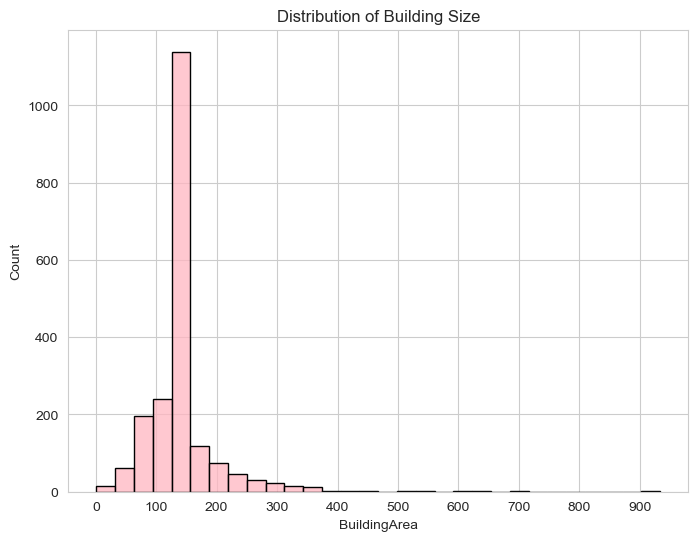

In [82]:
#Histogram which reflects the BuildingArea distribution
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.histplot(data=df, x='BuildingArea', bins = 30, color='lightpink', edgecolor = 'black', linewidth = 1)
plt.title('Distribution of Building Size')
plt.xticks(ticks=[i*100 for i in range(int(df['BuildingArea'].max()//100)+1)])
#plt.tight_layout()
plt.show()

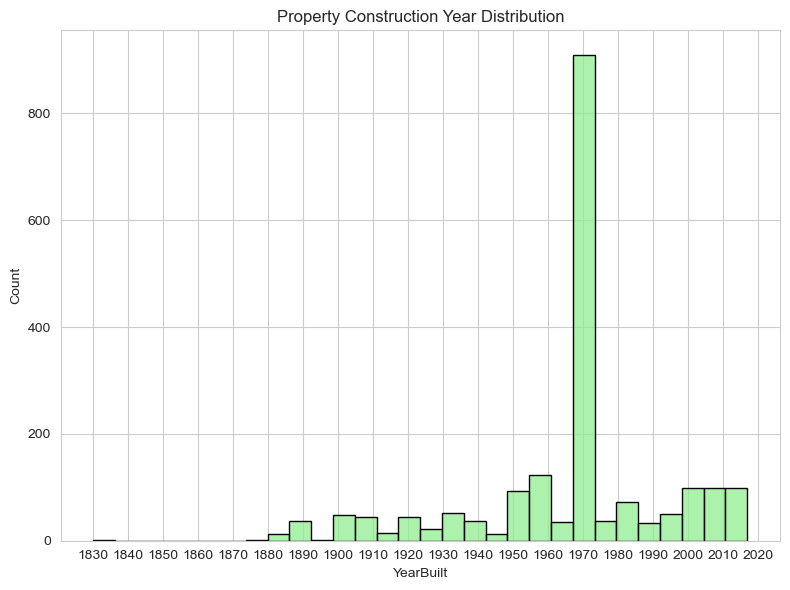

In [35]:
#Histogram depicting YearBuilt Distribution
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.histplot(data=df, x='YearBuilt', bins=30, color='lightgreen', edgecolor='black', linewidth=1)
plt.title('Property Construction Year Distribution')
plt.xticks(np.arange(min(df['YearBuilt']), max(df['YearBuilt'])+11, 10))  
plt.tight_layout()
plt.show()

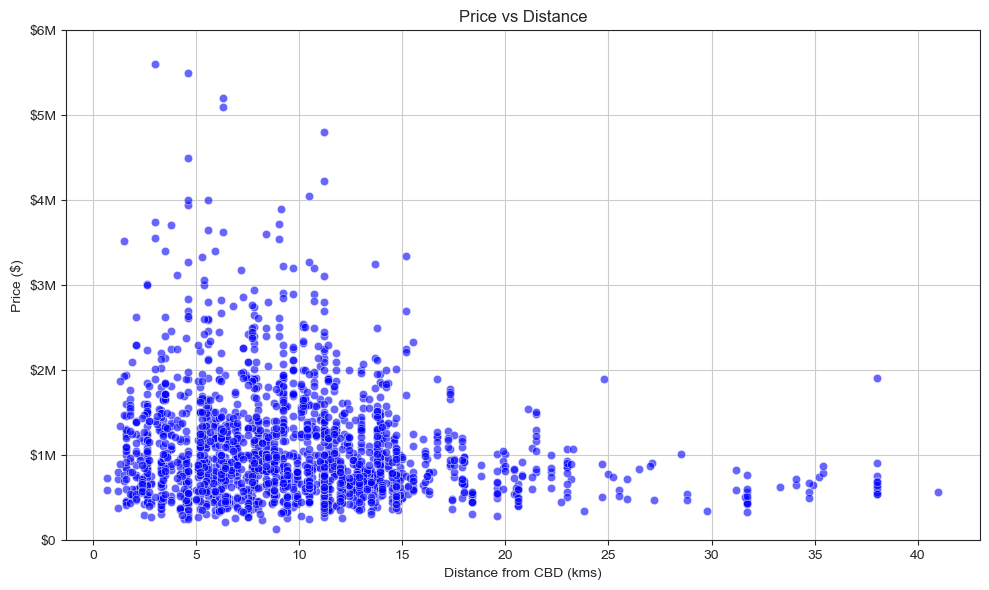

In [236]:
#Define custom tick positions and labels for y-axis
custom_ticks = [0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000]
custom_labels = ['$0', '$1M', '$2M', '$3M', '$4M', '$5M', '$6M']
#Scatterplot depicting Price vs Distance relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='Price', data=df, alpha=0.6, color='blue')
plt.title('Price vs Distance')
plt.xlabel('Distance from CBD (kms)')
plt.ylabel('Price ($)')
plt.ylim(0, 6000000)  #Limit y-axis to match the price range
plt.grid(True)
plt.yticks(ticks=custom_ticks, labels=custom_labels)  #Set custom y-axis ticks and labels
plt.tight_layout()
plt.show()

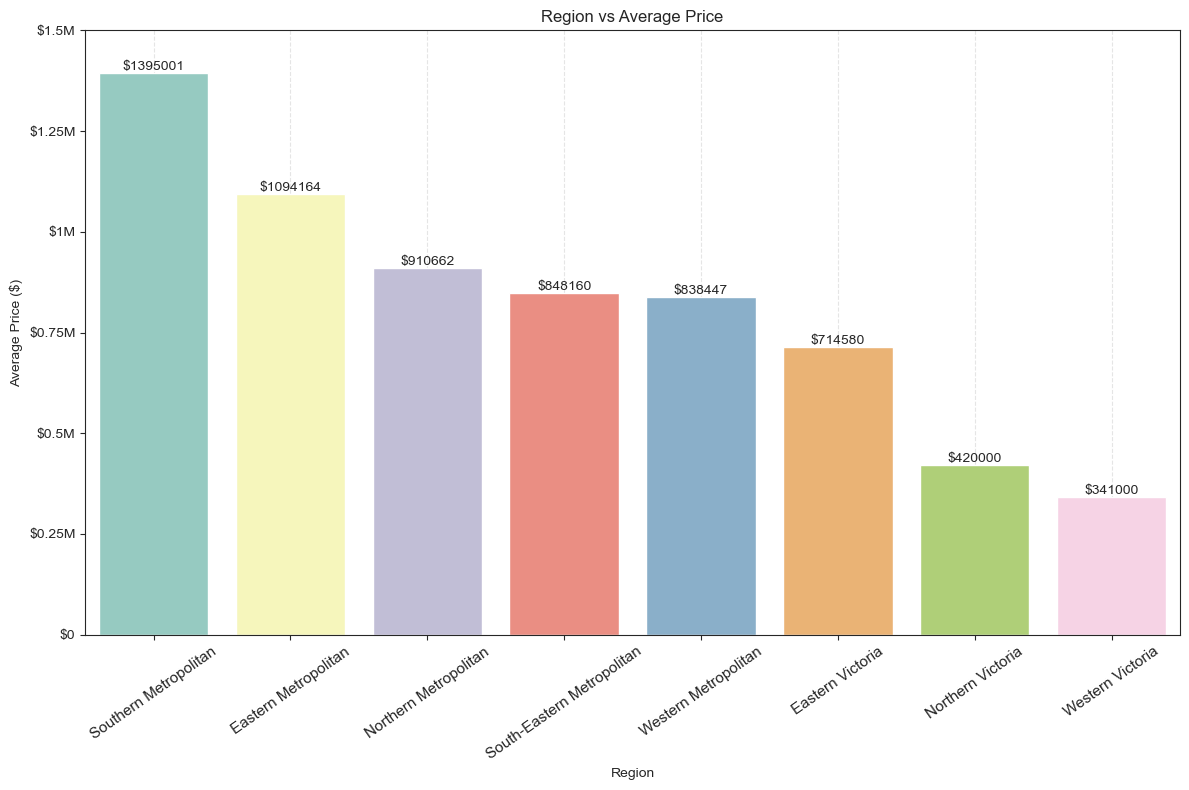

In [279]:
#Calculate the average price for each region
average_prices = df.groupby('RegionName')['Price'].mean().sort_values(ascending=False)
#Barplot highlighting Region vs Average Price
plt.figure(figsize=(12, 8))
sns.barplot(x=average_prices.index, y=average_prices.values, palette='Set3')
plt.title('Region vs Average Price')
plt.xlabel('Region')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=35, fontsize=11)  

#Set y-axis limit to $1.5 million
plt.ylim(0, 1500000)

#Define custom tick positions and labels for y-axis
custom_ticks = [0, 250000, 500000, 750000, 1000000, 1250000, 1500000]
custom_labels = ['$0', '$0.25M', '$0.5M', '$0.75M', '$1M', '$1.25M', '$1.5M']
plt.yticks(ticks=custom_ticks, labels=custom_labels)

#Add annotations on top of each bar
for i, v in enumerate(average_prices):
    plt.text(i, v, f'${v:.0f}', ha='center', va='bottom', fontsize=10)  # Format price without decimal points

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

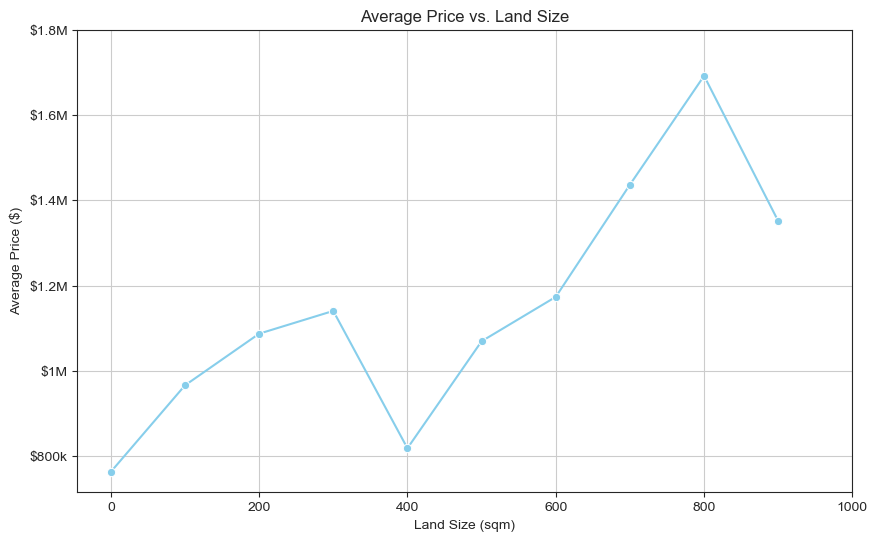

In [334]:
#Calculate the average price for each land size range
land_size_ranges = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

average_prices = []
for i in range(len(land_size_ranges) - 1):
    lower_bound = land_size_ranges[i]
    upper_bound = land_size_ranges[i+1]
    average_price = df[(df['LandSize'] >= lower_bound) & (df['LandSize'] < upper_bound)]['Price'].mean()
    average_prices.append(average_price)

#Create a line plot showcasing Average Prices vs Land Size
plt.figure(figsize=(10, 6))
sns.lineplot(x=land_size_ranges[:-1], y=average_prices, marker='o', color='skyblue')
plt.title('Average Price vs. Land Size')
plt.xlabel('Land Size (sqm)')
plt.ylabel('Average Price ($)')
plt.grid(True)

#Define custom tick positions and labels for y-axis
custom_ticks = [800000, 1000000, 1200000, 1400000, 1600000, 1800000]
custom_labels = ['$800k', '$1M', '$1.2M', '$1.4M', '$1.6M', '$1.8M']
plt.yticks(ticks=custom_ticks, labels=custom_labels)

#Define custom tick positions and labels for x-axis
custom_ticks_x = [0, 200, 400, 600, 800, 1000]
plt.xticks(ticks=custom_ticks_x, labels=custom_ticks_x)

plt.show()

In [89]:
#Converting categorical data to numerical data
encoder = LabelEncoder()

df['Suburb'] = encoder.fit_transform(df['Suburb'])
df['Address'] = encoder.fit_transform(df['Address'])
df['Type'] = encoder.fit_transform(df['Type'])
df['Method'] = encoder.fit_transform(df['Method'])
df['Seller'] = encoder.fit_transform(df['Seller'])
df['Date'] = encoder.fit_transform(df['Date'])
df['CouncilArea'] = encoder.fit_transform(df['CouncilArea'])
df['RegionName'] = encoder.fit_transform(df['RegionName'])

#Validate conversion
df.head(1)

,ID,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,Bedroom,Bathroom,Car,LandSize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,RegionName,PropertyCount
0,1,0,1549,4,0,1600000,4,87,3,2.5,3067,3,1,2,120,142.0,2014,27,-37.8072,144.9941,2,4019


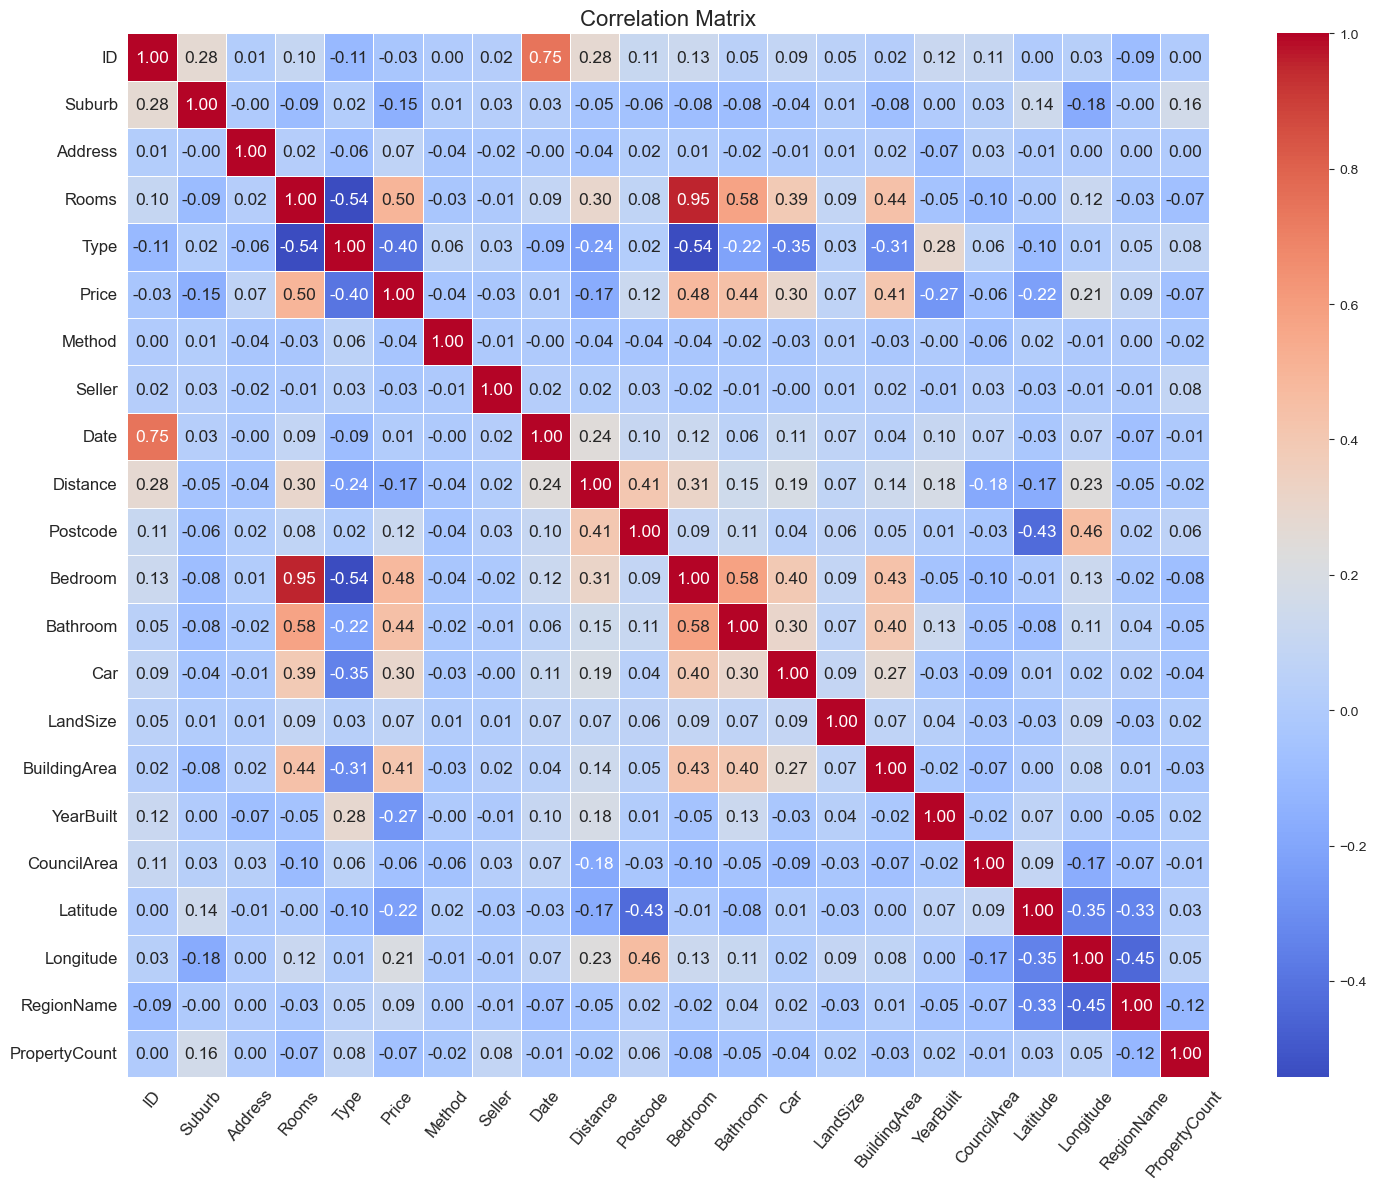

In [150]:
#Correlation between all features
plt.figure(figsize=(15, 12))  
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, annot_kws={"size": 12.5})
plt.title('Correlation Matrix', fontsize=16)  
plt.yticks(rotation=0, fontsize=12)  
plt.xticks(rotation=50, fontsize=12)  
plt.tight_layout()
plt.show()

In [90]:
#Dropping irrelevant columns
df.drop('ID',axis=1,inplace=True) 
df.drop('Address',axis=1,inplace=True) 
df.drop('Seller',axis=1,inplace=True) 
df.drop('Date',axis=1,inplace=True) 
df.drop('CouncilArea',axis=1,inplace=True) 
df.drop('Method',axis=1,inplace=True) 

In [91]:
#The percentile method with 5% tail and 95% upper thresholds for Price
feature = 'Price'

min_thre = df[feature].quantile(0.05)
max_thre = df[feature].quantile(0.95)
min_ex = len(df[df['Price'] < min_thre])
max_ex = len(df[df['Price'] > max_thre])

print(f'Length of data excluded below the lower threshold: {min_ex}\nLength of data excluded above the upper threshold: {max_ex}')

Length of data excluded below the lower threshold: 99
Length of data excluded above the upper threshold: 98


In [92]:
#Trimming Price for better distribution
print("Old Shape: ", df.shape)
df.drop(index=df[df['Price']<min_thre].index, inplace=True)
df.drop(index=df[df['Price']>max_thre].index, inplace=True) 
print("New Shape: ", df.shape)

Old Shape:  (1979, 16)
New Shape:  (1782, 16)


In [95]:
#Removing the extreme valid outlier of LandSize to increase model performance
df.drop(index=df[df['LandSize']==14196].index,inplace=True)

In [99]:
#Feature-target splitting
X = df.drop('Price', axis = 1)
y = df['Price']

In [100]:
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [101]:
#Feature Scaling
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [103]:
def evaluation(model, X_train, y_train, X_test, y_test, train=True, cv=5):
    if train:
        #Perform k-fold cross-validation on training data
        cv_scores_train_mse = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
        cv_scores_train_rmse = np.sqrt(-cv_scores_train_mse)
        cv_scores_train_mae = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')

        #Train the model on the full training data
        model.fit(X_train, y_train)

        #Evaluate the model on training data
        pred_train = model.predict(X_train)
        train_rmse = np.sqrt(mean_squared_error(y_train, pred_train))
        train_mae = mean_absolute_error(y_train, pred_train)
        r2_train = r2_score(y_train, pred_train)
        print("Train Result:\n=====================================================")
        print("Root Mean Squared Error: {:.2f}".format(train_rmse))
        print("Mean Absolute Error: {:.2f}".format(train_mae))
        print("R^2 Score: {:.2f}".format(r2_train))
        print("_____________________________________________________")
        print('\n')
        
    else:
        #Evaluate the model on test data
        pred_test = model.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, pred_test))
        test_mae = mean_absolute_error(y_test, pred_test)
        r2_test = r2_score(y_test, pred_test)
        print("Test Result:\n=====================================================")
        print("Root Mean Squared Error: {:.2f}".format(test_rmse))
        print("Mean Absolute Error: {:.2f}".format(test_mae))
        print("R^2 Score: {:.2f}".format(r2_test))
        print("_____________________________________________________")
        print()

In [104]:
#Supervised Machine Learning Algorithm: Linear Regression
lr = LinearRegression()
#Fitting the model with training data
lr.fit(X_train_std, y_train)

#Evaluate the model on the training data
evaluation(lr, X_train_std, y_train, X_test_std, y_test, train=True)
#Evaluate the model on the testing data
evaluation(lr, X_train_std, y_train, X_test_std, y_test, train=False)

Train Result:
Root Mean Squared Error: 274111.71
Mean Absolute Error: 207255.94
R^2 Score: 0.60
_____________________________________________________


Test Result:
Root Mean Squared Error: 263939.36
Mean Absolute Error: 195551.60
R^2 Score: 0.63
_____________________________________________________



In [113]:
#Supervised Machine Learning Algorithm: Random Forest Regression
rfr = RandomForestRegressor()
#Fitting the model with training data
rfr.fit(X_train, y_train)

#Evaluate the model on the training data
evaluation(rfr, X_train, y_train, X_test, y_test, train=True)
#Evaluate the model on the testing data
evaluation(rfr, X_train, y_train, X_test, y_test, train=False)

Train Result:
Root Mean Squared Error: 84016.70
Mean Absolute Error: 59618.31
R^2 Score: 0.96
_____________________________________________________


Test Result:
Root Mean Squared Error: 196528.64
Mean Absolute Error: 143159.89
R^2 Score: 0.79
_____________________________________________________



In [118]:
#Supervised Machine Learning Algorithm: Gradient Boosting Regressor 
gb_regressor = GradientBoostingRegressor()
#Fitting the model with training data
gb_regressor.fit(X_train, y_train)

#Evaluate the model on the training data
evaluation(gb_regressor, X_train, y_train, X_test, y_test, train=True)
#Evaluate the model on the testing data
evaluation(gb_regressor, X_train, y_train, X_test, y_test, train=False)

Train Result:
Root Mean Squared Error: 177708.93
Mean Absolute Error: 132090.68
R^2 Score: 0.83
_____________________________________________________


Test Result:
Root Mean Squared Error: 213851.41
Mean Absolute Error: 152702.23
R^2 Score: 0.76
_____________________________________________________



In [120]:
#RMSE scores
test_rmse_lr = round(np.sqrt(mean_squared_error(y_test, lr.predict(X_test))), 2)
test_rmse_rfr = round(np.sqrt(mean_squared_error(y_test, rfr.predict(X_test))), 2)
test_rmse_gbr = round(np.sqrt(mean_squared_error(y_test, gb_regressor.predict(X_test))), 2)

#MAE scores
test_mae_lr = round(mean_absolute_error(y_test, lr.predict(X_test)), 2)
test_mae_rfr = round(mean_absolute_error(y_test, rfr.predict(X_test)), 2)
test_mae_gbr = round(mean_absolute_error(y_test, gb_regressor.predict(X_test)), 2)

#R² scores
test_r2_lr = round(r2_score(y_test, lr.predict(X_test)), 2)
test_r2_rfr = round(r2_score(y_test, rfr.predict(X_test)), 2)
test_r2_gbr = round(r2_score(y_test, gb_regressor.predict(X_test)), 2)

#Store the results in a df
models = {
    'Test RMSE': [f"${test_rmse_lr:,}", f"${test_rmse_rfr:,}", f"${test_rmse_gbr:,}"],
    'Test MAE': [f"${test_mae_lr:,}", f"${test_mae_rfr:,}", f"${test_mae_gbr:,}"],
    'Test R² Score': [test_r2_lr, test_r2_rfr, test_r2_gbr]
}

models = pd.DataFrame(models, index=['Linear Regression', 'Random Forest Regression', 'Gradient Boosting Regression'])

#Display results
models.head()

,Test RMSE,Test MAE,Test R² Score
Linear Regression,"$263,939.36","$195,551.6",0.63
Random Forest Regression,"$196,528.64","$143,159.89",0.79
Gradient Boosting Regression,"$213,851.41","$152,702.23",0.76


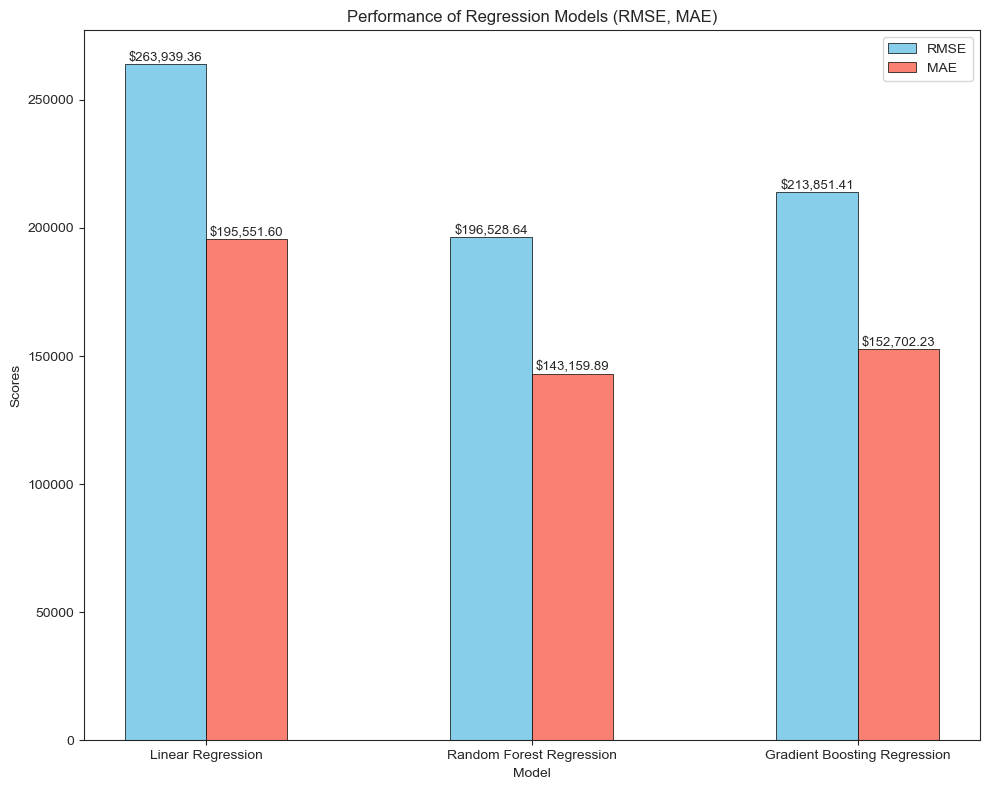

In [148]:
#Define the models and their corresponding scores
models = ['Linear Regression', 'Random Forest Regression', 'Gradient Boosting Regression']
rmse_scores = [test_rmse_lr, test_rmse_rfr, test_rmse_gbr]
mae_scores = [test_mae_lr, test_mae_rfr, test_mae_gbr]

#Set the width of the bars
bar_width = 0.25

#Set the position of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

#Grouped bar plot depicting model metric scores
plt.figure(figsize=(10, 8))
sns.set_style("ticks")
bars_rmse = plt.bar(r1, rmse_scores, color='skyblue', width=bar_width, edgecolor='black', linewidth=0.5, label='RMSE')
bars_mae = plt.bar(r2, mae_scores, color='salmon', width=bar_width, edgecolor='black', linewidth=0.5, label='MAE')

#Function to format RMSE and MAE scores as $
def format_scores(scores):
    return [f"${score:,.2f}" for score in scores]

#Add annotations above bars for RMSE and MAE scores
def add_labels(bars, scores):
    for bar, score in zip(bars, scores):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, score, ha='center', va='bottom', fontsize=9.5)

add_labels(bars_rmse, format_scores(rmse_scores))
add_labels(bars_mae, format_scores(mae_scores))

#Configure text
plt.xlabel('Model')
plt.ylabel('Scores')
plt.xticks([r + bar_width / 2 for r in range(len(models))], models, ha='center')
plt.title('Performance of Regression Models (RMSE, MAE)')
plt.legend()
plt.tight_layout()
plt.show()

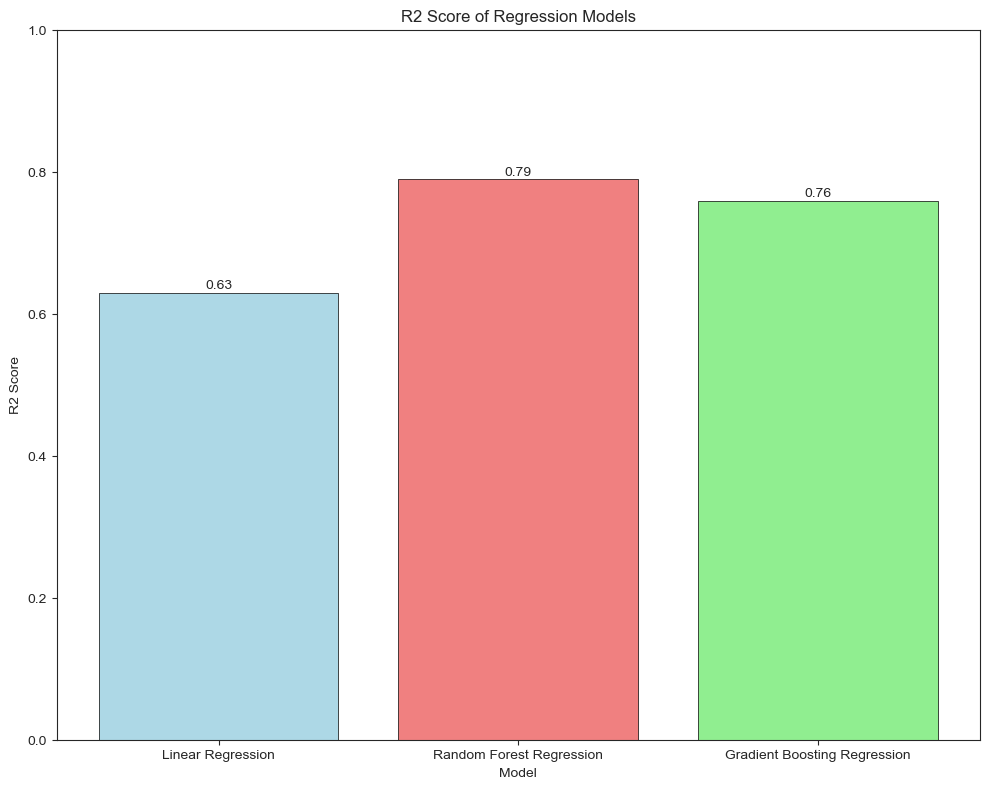

In [153]:
#Define the models and their corresponding R2 scores
models = ['Linear Regression', 'Random Forest Regression', 'Gradient Boosting Regression']
r2_scores = [test_r2_lr, test_r2_rfr, test_r2_gbr]

#Set the colors for each bar
light_colors = ['lightblue', 'lightcoral', 'lightgreen']

plt.figure(figsize=(10, 8))

#Create the bar plot 
bars = plt.bar(models, r2_scores, color=light_colors, edgecolor='black', linewidth=0.5)

#Annotate each bar with its R2 score
for bar, score in zip(bars, r2_scores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.001, f'{score:.2f}',
             ha='center', va='bottom', fontsize=10)

#Center the xticks
plt.xticks(rotation=0, ha='center')

plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('R2 Score of Regression Models')

#Set the y-axis range to be at a maximum of 1.0
plt.ylim(0, 1.0)

plt.tight_layout()
plt.show()

In [176]:
#LR coefficients in descending order
feature_importance = pd.DataFrame(lr.coef_, index=X_train.columns, columns=['Coefficient'])
feature_importance.sort_values(by='Coefficient', ascending=False)

,Coefficient
Longitude,1032540.90
Rooms,108251.80
Bathroom,97149.49
Car,36462.28
Bedroom,27222.75
RegionName,18098.53
BuildingArea,787.86
Postcode,366.81
LandSize,32.28
PropertyCount,-3.18


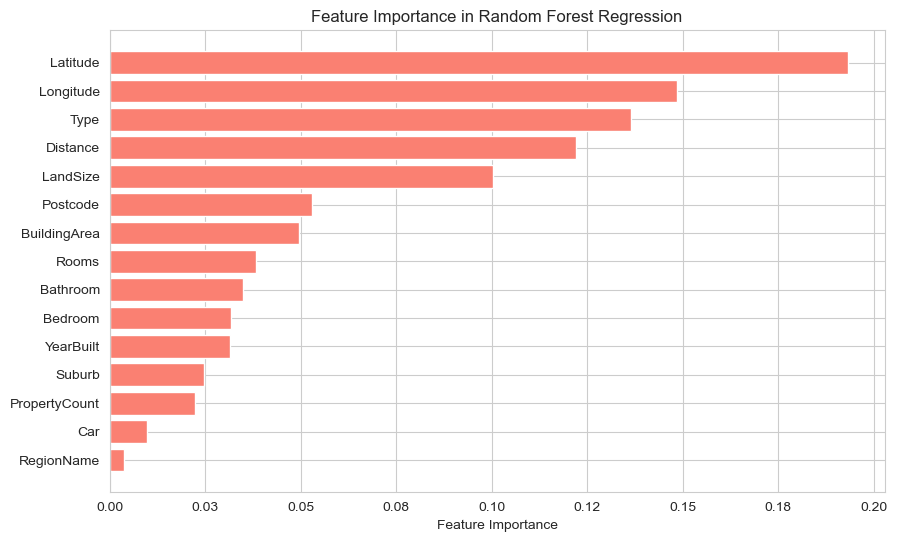

In [210]:
#Extracting Random Forest Regressor feature importance
feature_importances = rfr.feature_importances_
features = X_train.columns

#Creating a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='salmon', align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Regression')
plt.gca().invert_yaxis()  #Invert y-axis to display the most important feature at the top
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.show()